In [22]:
import morph_data as md
import pandas as pd
import numpy as np

In [15]:
train = pd.read_csv('codetest_train.txt',delimiter='\t')
test = pd.read_csv('codetest_test.txt',delimiter='\t')

## Exploration

Columns have Nans:      target    f_0    f_1    f_2    f_3    f_4    f_5    f_6    f_7    f_8  \
0  3.066056 -0.653  0.255 -0.615 -1.833 -0.736    NaN  1.115 -0.171 -0.351   
1 -1.910473  1.179 -0.093 -0.556  0.811 -0.468 -0.005 -0.116 -1.243  1.985   
2  7.830711  0.181 -0.778 -0.919  0.113  0.887 -0.762  1.872 -1.709  0.135   
3 -2.180862  0.745 -0.245 -1.343  1.163 -0.169 -0.151 -1.100  0.225  1.223   
4  5.462784  1.217 -1.324 -0.958  0.448 -2.873 -0.856  0.603  0.763  0.020   

   ...    f_244  f_245  f_246  f_247  f_248  f_249  f_250  f_251  f_252  f_253  
0  ...   -1.607 -1.400 -0.920 -0.198 -0.945 -0.573  0.170 -0.418 -1.244 -0.503  
1  ...    1.282  0.032 -0.061    NaN -0.061 -0.302  1.281 -0.850  0.821 -0.260  
2  ...   -0.237 -0.660  1.073 -0.193  0.570 -0.267  1.435  1.332 -1.147  2.580  
3  ...    0.709 -0.203 -0.136 -0.571  1.682  0.243 -0.381  0.613  1.033  0.400  
4  ...    0.892 -0.433 -0.877  0.289  0.654  1.230  0.457 -0.754 -0.025 -0.931  

[5 rows x 255 columns]
th

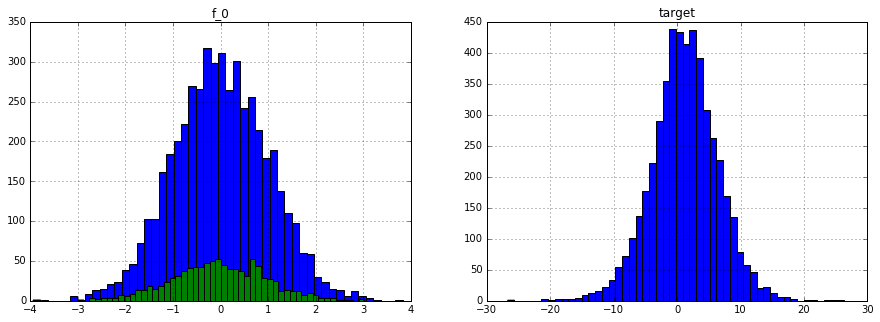

f_175 has a 0.566 Pearson's correlation with the target...


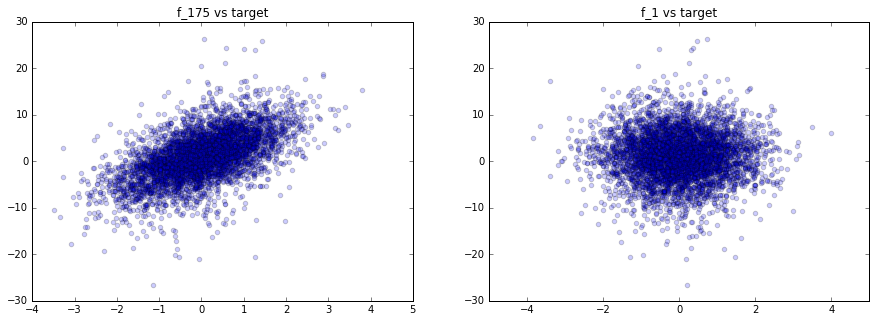

- Target correlates with features
- Features correlate with features


,Feature1,Feature2,PearsonCorrelation
19041,f_75,f_218,0.716496
54291,f_218,f_75,0.716496
51398,f_205,f_195,0.714579
48898,f_195,f_205,0.714579
43834,f_175,f_161,0.711786
40334,f_161,f_175,0.711786
9084,f_35,f_47,0.708471
12084,f_47,f_35,0.708471
42262,f_169,f_94,0.705370
23762,f_94,f_169,0.705370


In [63]:
print("Columns have Nans:"),
print(train.head())

print("there are 5000 rows and 255 'features':"),
print train.shape

print("There are several categorical features that seem to be used heavily in the xgboost model")
#### There are four categorical columns and the rest are continuous. 
print(md.categorical_columns(train))

print("Just by looking at the data we see that this is a regression problem.")
from matplotlib import pyplot as plt
%matplotlib inline

print("The data is normalized, unlabeled, centered at 0")
for i,k in enumerate(train.keys()[1::]):
    if i < 1:
        plt.figure(i,figsize=(15,5))
        plt.subplot(1, 2, 1)
        plt.title(k)
        train[k].hist(bins=50)
        test[k].hist(bins=50)

        
for i,k in enumerate(train.keys()):
    if i == 0:
        plt.subplot(1, 2, 2)
        plt.title(k)
        train[k].hist(bins=50)
plt.show()
print("f_175 has a 0.566 Pearson's correlation with the target...")
plt.figure(2,figsize=(15,5))
plt.subplot(1,2,1)
plt.title('f_175 vs target')
plt.scatter(train['f_175'], train['target'],alpha=.2)
plt.subplot(1,2,2)
plt.title('f_1 vs target')
plt.scatter(train['f_1'], train['target'],alpha=.2)
plt.show()


print("- Target correlates with features") 
print("- Features correlate with features")
x = train.corr().unstack().reset_index()
x = x[x[0] != 1]
correlated_features = x.sort_values(by=0,ascending=False)
correlated_features.columns = ["Feature1","Feature2","PearsonCorrelation"]
correlated_features.drop_duplicates(subset='Feature1').head(15)

## Imput NaN's in Training Samples

There are only 32 rows with all features present
Percentage of NaN's in the dataset: 1.9770
Average # Nan's per feature: 98.8510
Use the fancyimpute library to fill in missing data...
https://github.com/hammerlab/fancyimpute


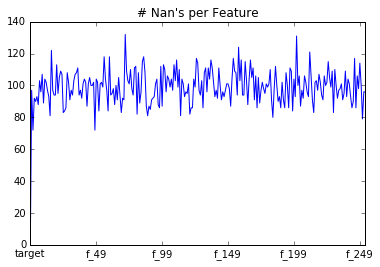

In [64]:
print "There are only %d rows with all features present" % train.dropna().shape[0]
print "Percentage of NaN's in the dataset: %0.4f" % (np.sum(mm)/float(5000*255)*100)
## graph of nan distribution
mm = 5000 - train.count(axis=0)  # train.count doesn't count nan's
print "Average # Nan's per feature: %0.4f" % np.mean(mm)
plt.title("# Nan's per Feature")
mm.plot()
print "Use the fancyimpute library to fill in missing data..."
print "https://github.com/hammerlab/fancyimpute"

In [3]:
df = md.call_morph_data(train)

Find Categorical Features...
['f_61', 'f_121', 'f_215', 'f_237']
Fill Categorical NaNs with Distribution...
Build Dummy columns for each category...
   a  b  c  d  e  A  B  C  D  E  F  blue  orange  red  yellow  Canada  Mexico  \
0  0  1  0  0  0  0  0  0  1  0  0     0       0    1       0       1       0   
1  1  0  0  0  0  1  0  0  0  0  0     1       0    0       0       1       0   

   USA  
0    0  
1    0  
Fill Continuous data with k nearest neighbor values...
Computing pairwise distances between 5000 samples
Computing distances for sample #1/5000, elapsed time: 8.246
Computing distances for sample #101/5000, elapsed time: 9.123
Computing distances for sample #201/5000, elapsed time: 9.998
Computing distances for sample #301/5000, elapsed time: 10.859
Computing distances for sample #401/5000, elapsed time: 11.723
Computing distances for sample #501/5000, elapsed time: 12.587
Computing distances for sample #601/5000, elapsed time: 13.451
Computing distances for sample #701/500

In [89]:
y = df["target"]
X = df.drop("target",1)

## Build a Model

In [132]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Linear Regression

In [122]:
from sklearn.linear_model import ElasticNet
from sklearn import grid_search

parameters = {'alpha':[1,.1,0.1],'l1_ratio':[0,.2,.5,.8,1]} 
#The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. 
#For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. 
#For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

elNet = ElasticNet(random_state=1)
regressor = grid_search.GridSearchCV(elNet, parameters)
regressor.fit(X,y)

print regressor.best_estimator_

/Users/ingrid/.local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/ingrid/.local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False)


In [130]:
lasso_y = regressor.predict(X_test)
print mean_squared_error(y_test, lasso_y)
print("R Squared %.4f" % r2_score(np.array(y_test), lasso_y)) 

9.81238802866
R Squared 0.6153


### xgboost

In [70]:
# http://xgboost.readthedocs.io/en/latest/model.html
import xgboost as xgb
label = np.array(y_train)
train_data = np.array(X_train)
test_data = np.array(X_test)
dtrain = xgb.DMatrix(train_data,label=label)
dtest = xgb.DMatrix(test_data)
param = {
        'eta':0.1,  #step shrinkage size
        'silent':0,  #verbose
        'booster' :  'gbtree', # choose the booster, can be gbtree or gblinear
        'gamma' : 0, # minimum loss reduction required to make a further partition
        'objective':'reg:linear',  #
        'eval_metric':['logloss','rmse'], #evaluate with logloss for multiclass
        'min_child_weight' : 1, # minimum sum of instance weight(hessian) needed in a child
        'max_depth' : 4, # maximum depth of a tree
        'nthread':4, #use 4 threads        
        } 
#consider playing with gamma in the above parameters

num_round = 1000
watchlist  = [(dtrain,'train')]
bst = xgb.train(param, dtrain, num_round, watchlist)

[0]	train-logloss:-37.441528	train-rmse:5.089975
[1]	train-logloss:-81.268967	train-rmse:4.892078
[2]	train-logloss:-87.106255	train-rmse:4.718781
[3]	train-logloss:-90.288513	train-rmse:4.568308
[4]	train-logloss:-91.892288	train-rmse:4.436162
[5]	train-logloss:-92.936050	train-rmse:4.322114
[6]	train-logloss:-94.925957	train-rmse:4.221623
[7]	train-logloss:-96.362076	train-rmse:4.124326
[8]	train-logloss:-96.909485	train-rmse:4.037476
[9]	train-logloss:-97.992149	train-rmse:3.964598
[10]	train-logloss:-100.105896	train-rmse:3.871897
[11]	train-logloss:-100.478767	train-rmse:3.804960
[12]	train-logloss:-101.816452	train-rmse:3.744682
[13]	train-logloss:-102.701256	train-rmse:3.693223
[14]	train-logloss:-103.286934	train-rmse:3.633715
[15]	train-logloss:-104.033478	train-rmse:3.587034
[16]	train-logloss:-104.467438	train-rmse:3.543004
[17]	train-logloss:-105.407936	train-rmse:3.493731
[18]	train-logloss:-105.933617	train-rmse:3.456001
[19]	train-logloss:-107.350395	train-rmse:3.389214


In [127]:
y_predict = bst.predict(dtest)
mse = mean_squared_error(np.array(y_test), y_predict)
print("MSE: %.4f" % mse)
print("R Squared %.4f" % r2_score(np.array(y_test), y_predict)) 

MSE: 4.7589
R Squared 0.8134


### MARS

In [102]:
from pyearth import Earth
model = Earth(max_degree=4)
model.fit(train_data,label)

Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, max_degree=4, max_terms=None, min_search_points=None,
   minspan=None, minspan_alpha=None, penalty=None, smooth=None,
   thresh=None, use_fast=None, zero_tol=None)

In [160]:
#Print the model
print(model.trace())
print(model.summary())

Forward Pass
-----------------------------------------------------------------
iter  parent  var  knot  mse        terms  gcv     rsq    grsq   
-----------------------------------------------------------------
0     -       -    -     27.896173  1      27.909  0.000  0.000  
1     0       173  -1    18.869536  2      18.912  0.324  0.322  
2     0       203  -1    15.309086  3      15.371  0.451  0.449  
3     0       254  -1    13.959630  4      14.041  0.500  0.497  
4     0       35   -1    13.112384  5      13.212  0.530  0.527  
5     0       215  15    12.398000  7      12.537  0.556  0.551  
6     6       93   15    10.141675  9      10.292  0.636  0.631  
7     0       93   -1    2.619277   10     2.663   0.906  0.905  
8     0       252  -1    2.087737   11     2.126   0.925  0.924  
9     0       266  -1    1.769914   12     1.806   0.937  0.935  
10    4       72   15    1.723286   14     1.765   0.938  0.937  
11    0       265  -1    1.681425   15     1.725   0.940  0.938

## Model Summaries

In [157]:
## table of R2, MSE for each model 
def r2_mse(model_list,names):
    r2 = []
    mse = []
    for i,model in enumerate(model_list):
        y_pred = model.predict(X_test)
        r2.append(r2_score(np.array(y_test), y_pred))
        mse.append(mean_squared_error(y_test, y_pred))
    y_pred = bst.predict(dtest)
    mse.append(mean_squared_error(np.array(y_test), y_predict))
    r2.append(r2_score(np.array(y_test), y_predict))
    df = pd.DataFrame([r2,mse],index=['r2','mse'],columns=names)
    return df

In [158]:
model_list = [regressor,model]
names = ["Linear Regression","MARS","xgboost"]
r2_mse(model_list,names)

,Linear Regression,MARS,xgboost
r2,0.615261,0.938580,0.813408
mse,9.812388,1.566452,4.758861


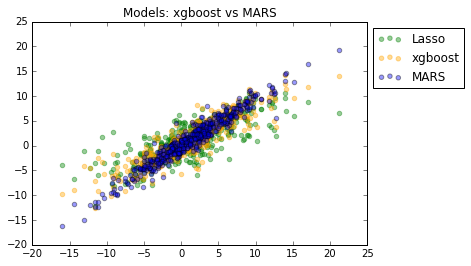

In [159]:
## graph of y vs y_pred for each
plt.figure(1)
plt.title("Models: xgboost vs MARS")
plt.scatter(y_test, lasso_y,color = 'green', label='Lasso',alpha=.4)
plt.scatter(y_test, y_predict,color = 'orange', label='xgboost',alpha=.4)
plt.scatter(y_test, y_hat,label='MARS',alpha=.4)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()
## Why does MARS work best?
## What were the most important features of the Mars model